**MACHINE LEARNING**

# Importing libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from fastai.tabular.core import add_datepart
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, train_test_split
import xgboost as xgb
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report, f1_score,accuracy_score ,confusion_matrix
from sklearn.metrics import r2_score
import scipy.cluster.hierarchy as sch
import scipy.spatial.distance as ssd
import matplotlib.pyplot as plt
from scipy.stats import randint
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from __future__ import unicode_literals
from collections import Counter
from math import *
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import ElasticNet
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest
import matplotlib.gridspec as gridspec
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
store_df = pd.read_csv("store.csv")

<ipython-input-2-fd600cfb81b8>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv("train.csv")


In [3]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [5]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
# se unen los datasets
train_df = pd.merge(train_df,store_df,how="inner",on="Store")
test_df = pd.merge(test_df,store_df,how="inner",on="Store")

In [7]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140326 entries, 0 to 140325
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      140326 non-null  int64  
 1   DayOfWeek                  140326 non-null  int64  
 2   Date                       140326 non-null  object 
 3   Sales                      140326 non-null  int64  
 4   Customers                  140326 non-null  int64  
 5   Open                       140326 non-null  int64  
 6   Promo                      140325 non-null  float64
 7   StateHoliday               140325 non-null  object 
 8   SchoolHoliday              140325 non-null  float64
 9   StoreType                  140326 non-null  object 
 10  Assortment                 140326 non-null  object 
 11  CompetitionDistance        139948 non-null  float64
 12  CompetitionOpenSinceMonth  95775 non-null   float64
 13  CompetitionOpenSinceYear   95

In [ ]:
train_df.shape

(140326, 18)

#Ingeniería de atributos

##Train / Store sets

In [ ]:
# se analiza la cantidad de na
train_df.isna().sum()

Store                            0
DayOfWeek                        0
Date                             0
Sales                            0
Customers                        0
Open                             0
Promo                            1
StateHoliday                     1
SchoolHoliday                    1
StoreType                        0
Assortment                       0
CompetitionDistance            378
CompetitionOpenSinceMonth    44551
CompetitionOpenSinceYear     44551
Promo2                           0
Promo2SinceWeek              68474
Promo2SinceYear              68474
PromoInterval                68474
dtype: int64

In [8]:
# se reemplazan los nan de "CompetitionDistance" por la media
train_df["CompetitionDistance"].replace(np.nan,train_df["CompetitionDistance"].mean(),inplace=True)
# se transforma a 0 todos los valores de na del data set de train
train_df.fillna(0,inplace=True)

In [9]:
train_df["Store"].nunique()

1115

In [10]:
train_df["DayOfWeek"].unique()

array([5, 4, 3, 2, 1, 7, 6])

In [11]:
# se transofmra la fecha a formato datetime
train_df['Date'] = pd.to_datetime(train_df['Date'])

In [12]:
# se obtienen nuevos feautres a partir de la fecha
train_df = add_datepart(train_df, 'Date' , drop=False)

In [13]:
train_df['WeekOfYear'] = train_df.Date.dt.weekofyear

<ipython-input-13-385ad79e598d>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  train_df['WeekOfYear'] = train_df.Date.dt.weekofyear


In [14]:
train_df["Sales"].describe()

count    1.017209e+06
mean     5.773819e+03
std      3.849926e+03
min      0.000000e+00
25%      3.727000e+03
50%      5.744000e+03
75%      7.856000e+03
max      4.155100e+04
Name: Sales, dtype: float64

In [ ]:
train_df["Customers"].describe()

count    140326.000000
mean        625.992083
std         467.069209
min           0.000000
25%         403.000000
50%         610.000000
75%         832.000000
max        5458.000000
Name: Customers, dtype: float64

In [ ]:
train_df["Open"].unique()

array([1, 0])

In [ ]:
train_df["Promo"].unique()

array([1., 0.])

In [ ]:
train_df["StateHoliday"].unique()

array(['0', 'a', 'b', 0], dtype=object)

In [15]:
train_df["StateHoliday"].replace("0",0,inplace=True)

In [ ]:
train_df["SchoolHoliday"].unique()

array([1., 0.])

In [ ]:
train_df["StoreType"].unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [ ]:
train_df["Assortment"].unique()

array(['a', 'c', 'b'], dtype=object)

In [ ]:
train_df["CompetitionDistance"].describe()

count    140326.000000
mean       5406.137208
std        7650.697276
min          20.000000
25%         720.000000
50%        2330.000000
75%        6880.000000
max       75860.000000
Name: CompetitionDistance, dtype: float64

In [ ]:
train_df["Promo2"].unique()

array([0, 1])

In [ ]:
train_df["CompetitionOpenSinceMonth"].unique()

array([ 9., 11., 12.,  4., 10.,  8.,  0.,  3.,  6.,  5.,  1.,  2.,  7.])

In [ ]:
train_df["CompetitionOpenSinceYear"].unique()

array([2008., 2007., 2006., 2009., 2015., 2013., 2014., 2000., 2011.,
          0., 2010., 2005., 1999., 2003., 2012., 2004., 2002., 1961.,
       1995., 2001., 1990., 1994., 1900., 1998.])

In [ ]:
train_df["Promo2SinceWeek"].unique()

array([ 0., 13., 14.,  1., 45., 40., 26., 22.,  5.,  6., 10., 31., 37.,
        9., 39., 27., 18., 35., 23., 48., 36., 50., 44., 49., 28.])

In [ ]:
train_df["Promo2SinceYear"].unique()

array([   0., 2010., 2011., 2012., 2009., 2014., 2015., 2013.])

In [ ]:
train_df["PromoInterval"].unique()

array([0, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [16]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,5.584297e+02,3.219087e+02,1.000000e+00,2.800000e+02,5.580000e+02,8.380000e+02,1.115000e+03
DayOfWeek,1017209.0,3.998341e+00,1.997391e+00,1.000000e+00,2.000000e+00,4.000000e+00,6.000000e+00,7.000000e+00
Sales,1017209.0,5.773819e+03,3.849926e+03,0.000000e+00,3.727000e+03,5.744000e+03,7.856000e+03,4.155100e+04
Customers,1017209.0,6.331459e+02,4.644117e+02,0.000000e+00,4.050000e+02,6.090000e+02,8.370000e+02,7.388000e+03
Open,1017209.0,8.301067e-01,3.755392e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Promo,1017209.0,3.815145e-01,4.857586e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
SchoolHoliday,1017209.0,1.786467e-01,3.830564e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
CompetitionDistance,1017209.0,5.430086e+03,7.705298e+03,2.000000e+01,7.100000e+02,2.330000e+03,6.880000e+03,7.586000e+04
CompetitionOpenSinceMonth,1017209.0,4.926878e+00,4.283543e+00,0.000000e+00,0.000000e+00,4.000000e+00,9.000000e+00,1.200000e+01
CompetitionOpenSinceYear,1017209.0,1.370173e+03,9.353634e+02,0.000000e+00,0.000000e+00,2.006000e+03,2.011000e+03,2.015000e+03


In [17]:
train_df["StateHoliday"].value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [18]:
# Se reemplaza por su significado
train_df["StateHoliday"] = train_df["StateHoliday"].replace("a","Public Holiday").replace("b","Easter holiday").replace("c","Christmas").replace(0,"No Holiday")

In [ ]:
train_df["StoreType"].value_counts()

a    75763
d    43807
c    18616
b     2140
Name: StoreType, dtype: int64

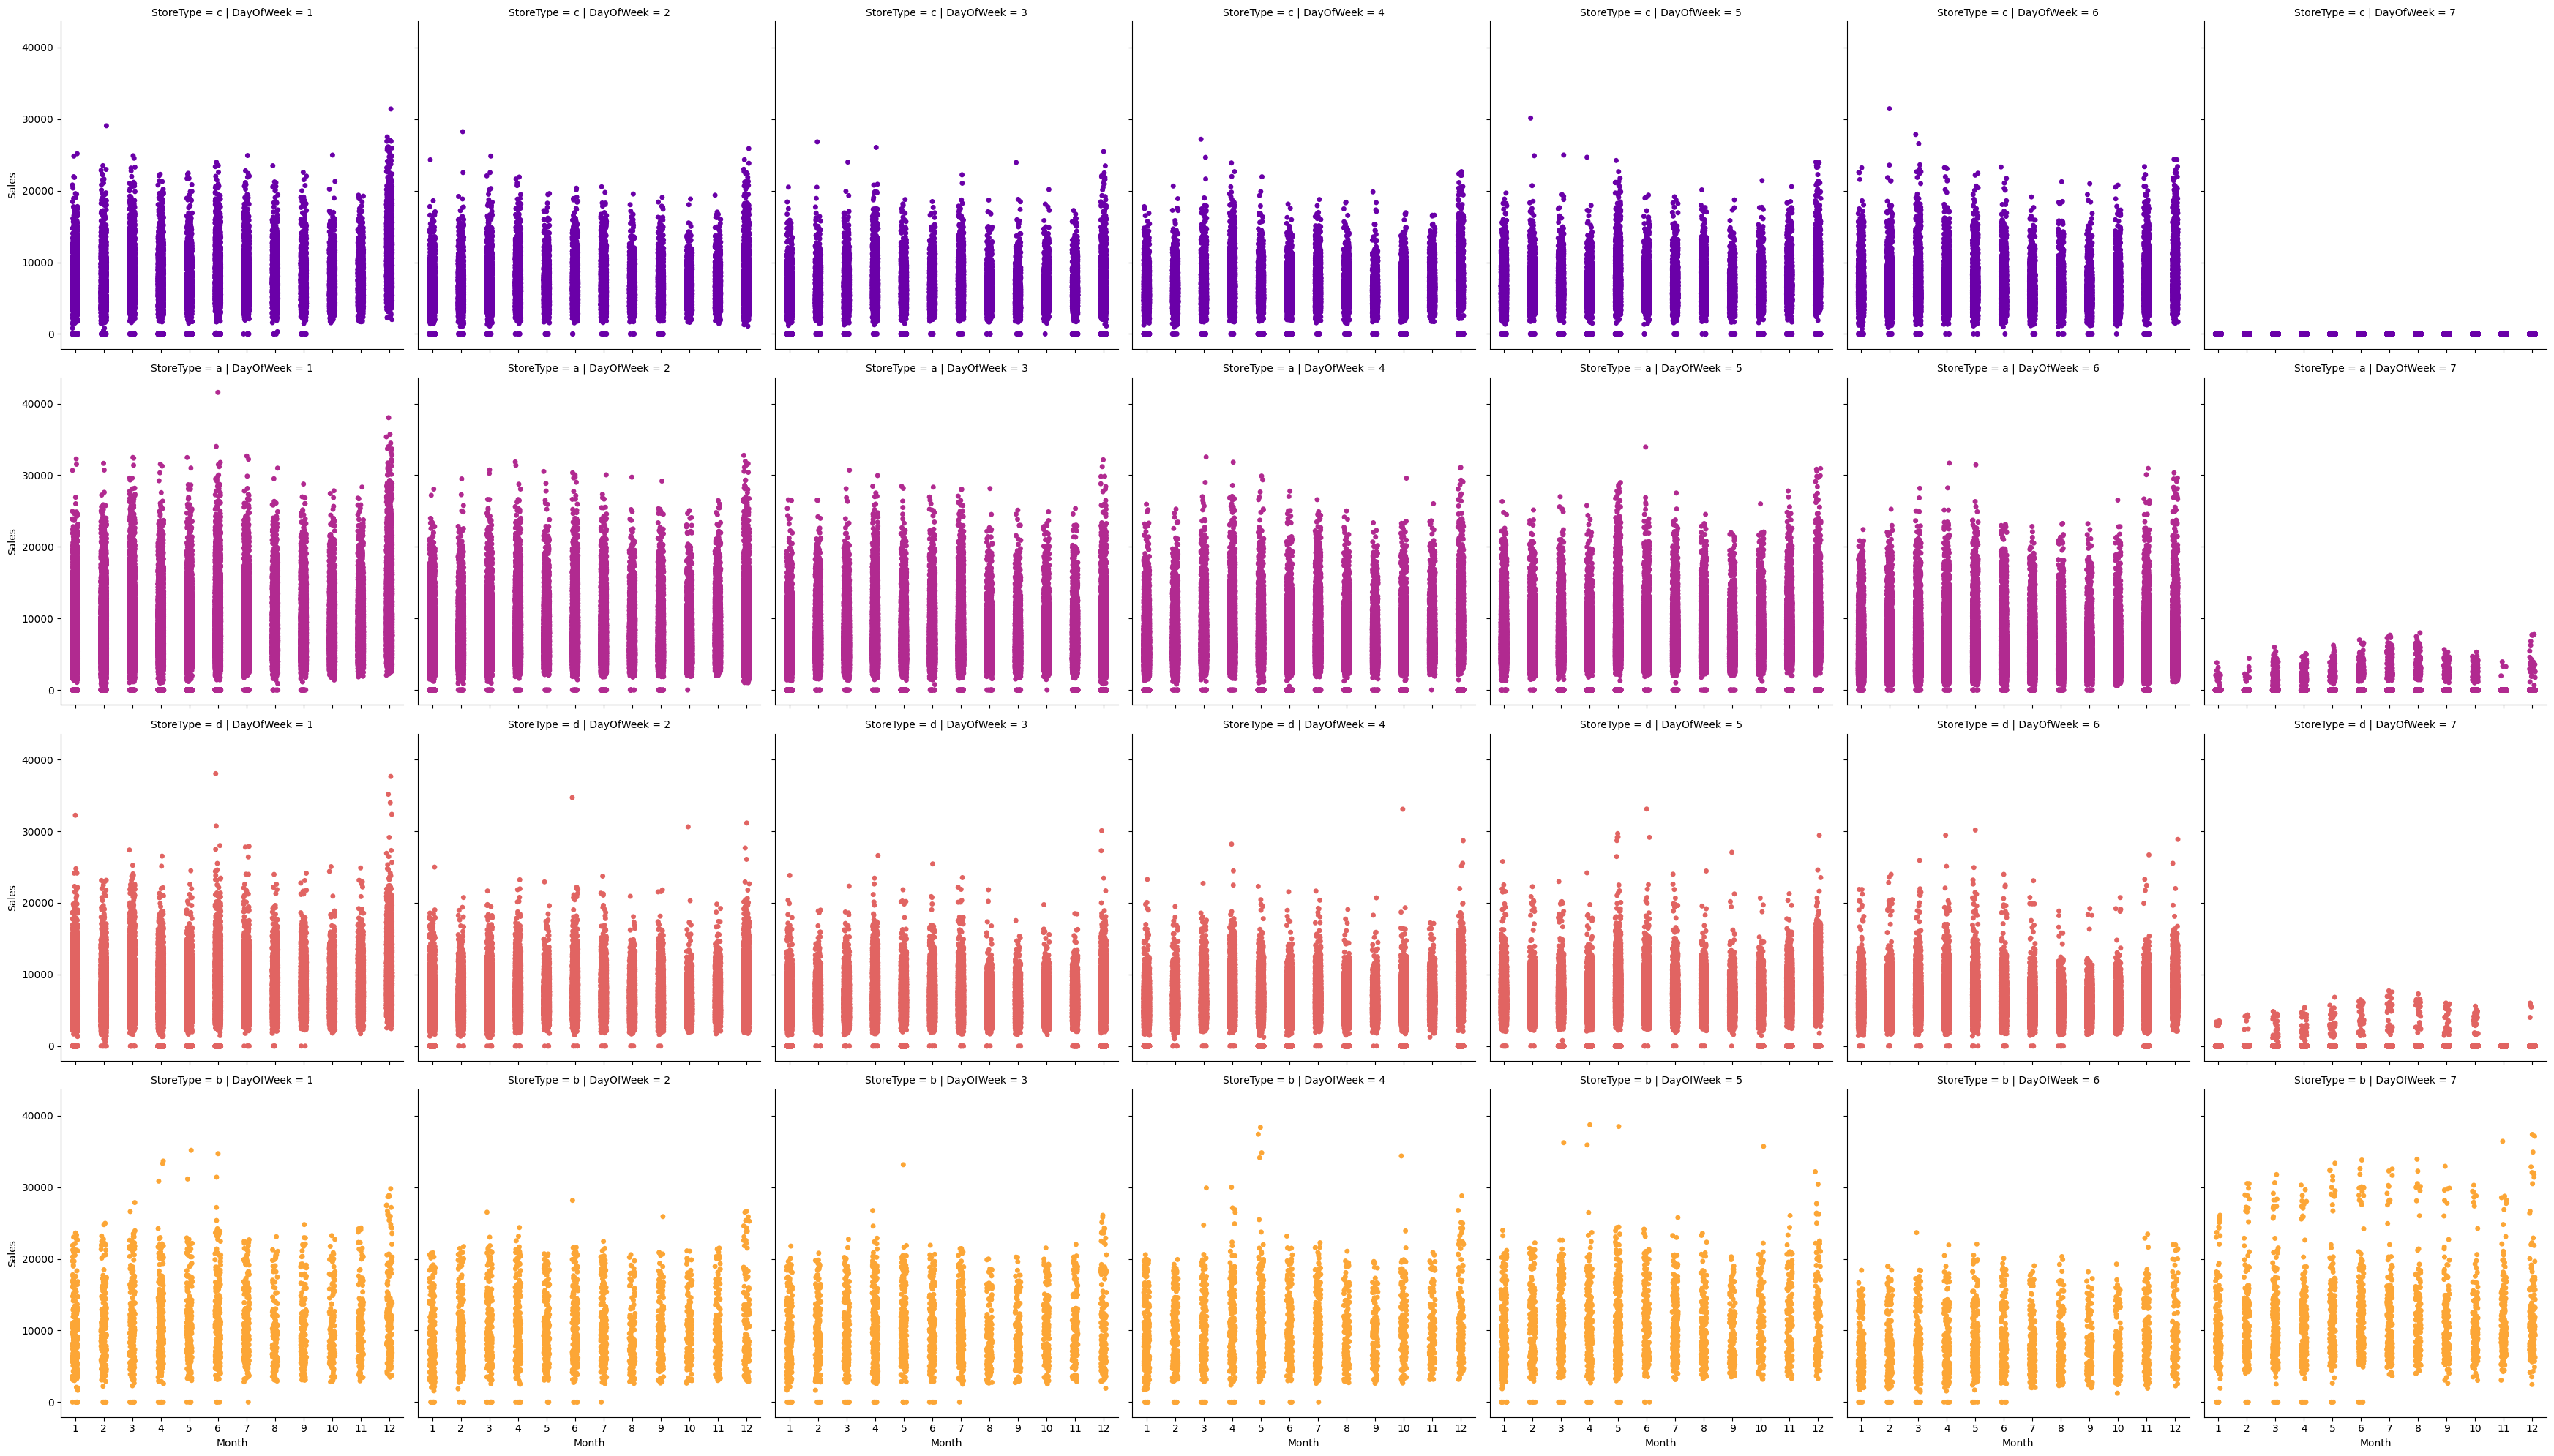

In [19]:
#Grafico de análisis de ventas por StoreType según Mes y Dia de la semana
sns.catplot(data = train_df, x = 'Month', y = "Sales",
               col = 'DayOfWeek',
               palette = 'plasma',
               hue = 'StoreType',
               row = 'StoreType' )

In [20]:
# Se reemplaza por su significado
train_df["StoreType"] = train_df["StoreType"].replace("a","Type A").replace("b","Type B").replace("c","Type C").replace("d","Type D")

In [ ]:
train_df["Assortment"].value_counts()

a    74632
c    64561
b     1133
Name: Assortment, dtype: int64

In [21]:
# Se reemplaza por su significado
train_df["Assortment"] = train_df["Assortment"].replace("a","Basic").replace("b","Extra").replace("c","Extended")

In [ ]:
train_df["PromoInterval"].value_counts()

0                   68474
Jan,Apr,Jul,Oct     42151
Feb,May,Aug,Nov     16360
Mar,Jun,Sept,Dec    13341
Name: PromoInterval, dtype: int64

In [22]:
# Se reemplaza por su significado
train_df["PromoInterval"] = train_df["PromoInterval"].replace(0,"No PromoInterval").replace("Jan,Apr,Jul,Oct","From Jan to Oct").replace("Feb,May,Aug,Nov","From Feb to Nov").replace("Mar,Jun,Sept,Dec","From Mar to Dec")

In [23]:
# se aplica one-hot-encoding
StateHoliday_dumm = pd.get_dummies(train_df["StateHoliday"])
train_df =pd.concat([train_df,StateHoliday_dumm],axis=1)
train_df.drop("StateHoliday",axis=1,inplace=True)

In [24]:
StoreType_dumm = pd.get_dummies(train_df["StoreType"])
train_df =pd.concat([train_df,StoreType_dumm],axis=1)
train_df.drop("StoreType",axis=1,inplace=True)

In [25]:
Assortment_dumm = pd.get_dummies(train_df["Assortment"])
train_df =pd.concat([train_df,Assortment_dumm],axis=1)
train_df.drop("Assortment",axis=1,inplace=True)

In [26]:
PromoInterval_dumm = pd.get_dummies(train_df["PromoInterval"])
train_df =pd.concat([train_df,PromoInterval_dumm],axis=1)
train_df.drop("PromoInterval",axis=1,inplace=True)

In [ ]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,...,Type B,Type C,Type D,Basic,Extended,Extra,From Feb to Nov,From Jan to Oct,From Mar to Dec,No PromoInterval
0,1,5,2015-07-31,5263,555,1,1.0,1.0,1270.0,9.0,...,0,1,0,1,0,0,0,0,0,1
1,1,4,2015-07-30,5020,546,1,1.0,1.0,1270.0,9.0,...,0,1,0,1,0,0,0,0,0,1
2,1,3,2015-07-29,4782,523,1,1.0,1.0,1270.0,9.0,...,0,1,0,1,0,0,0,0,0,1
3,1,2,2015-07-28,5011,560,1,1.0,1.0,1270.0,9.0,...,0,1,0,1,0,0,0,0,0,1
4,1,1,2015-07-27,6102,612,1,1.0,1.0,1270.0,9.0,...,0,1,0,1,0,0,0,0,0,1


In [ ]:
# se analiza la correlación
train_df.corr()

<ipython-input-47-9473911a9d27>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df.corr()


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,...,Type B,Type C,Type D,Basic,Extended,Extra,From Feb to Nov,From Jan to Oct,From Mar to Dec,No PromoInterval
Store,1.000000,-0.001730,0.000622,0.020148,-0.000105,0.001403,0.004938,-0.026998,-0.030053,-0.005482,...,0.001367,0.060761,-0.050386,-0.005538,0.002185,0.018708,0.005443,0.011459,-0.011457,-0.007280
DayOfWeek,-0.001730,1.000000,-0.464963,-0.378248,-0.499267,-0.404998,-0.216519,0.000161,0.000046,0.000014,...,0.000029,-0.000215,0.000157,0.000017,-0.000022,0.000026,-0.000020,-0.000151,0.000014,0.000143
Sales,0.000622,-0.464963,1.000000,0.887224,0.702808,0.448027,0.135761,-0.006273,-0.022907,-0.010359,...,0.157270,-0.010180,-0.003858,-0.104704,0.089054,0.087839,-0.044920,-0.029801,-0.053199,0.087388
Customers,0.020148,-0.378248,0.887224,1.000000,0.634485,0.303176,0.104523,-0.087616,-0.025624,-0.011965,...,0.400836,0.026719,-0.174847,-0.052885,-0.004530,0.320101,-0.067772,-0.079007,-0.062931,0.152898
Open,-0.000105,-0.499267,0.702808,0.634485,1.000000,0.274546,0.119024,0.013641,0.001325,0.000238,...,0.058912,-0.004007,-0.007268,-0.008394,0.000735,0.042711,-0.006132,-0.005103,-0.002231,0.009927
Promo,0.001403,-0.404998,0.448027,0.303176,0.274546,1.000000,0.156990,-0.000131,-0.000037,-0.000011,...,-0.000024,0.000175,-0.000127,-0.000014,0.000018,-0.000021,0.000016,0.000123,-0.000012,-0.000116
SchoolHoliday,0.004938,-0.216519,0.135761,0.104523,0.119024,0.156990,1.000000,-0.012531,-0.008321,-0.008336,...,-0.003578,-0.007892,-0.021219,0.001089,-0.000223,-0.004834,0.008259,-0.014603,-0.001313,0.008860
CompetitionDistance,-0.026998,0.000161,-0.006273,-0.087616,0.013641,-0.000131,-0.012531,1.000000,-0.032482,-0.002042,...,-0.070676,-0.096195,0.131962,-0.139580,0.148695,-0.049858,-0.051123,-0.088290,-0.053964,0.145460
CompetitionOpenSinceMonth,-0.030053,0.000046,-0.022907,-0.025624,0.001325,-0.000037,-0.008321,-0.032482,1.000000,0.785032,...,-0.040712,0.016784,-0.042596,0.100456,-0.091166,-0.052391,-0.024239,-0.051053,-0.031166,0.080672
CompetitionOpenSinceYear,-0.005482,0.000014,-0.010359,-0.011965,0.000238,-0.000011,-0.008336,-0.002042,0.785032,1.000000,...,-0.041110,0.033812,-0.076921,0.128210,-0.116154,-0.067972,-0.076385,-0.003110,-0.074590,0.095664


In [ ]:
train_df.corr()["Sales"]

<ipython-input-48-099f9a1bfcbb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df.corr()["Sales"]


Store                        0.000622
DayOfWeek                   -0.464963
Sales                        1.000000
Customers                    0.887224
Open                         0.702808
Promo                        0.448027
SchoolHoliday                0.135761
CompetitionDistance         -0.006273
CompetitionOpenSinceMonth   -0.022907
CompetitionOpenSinceYear    -0.010359
Promo2                      -0.087388
Promo2SinceWeek             -0.041312
Promo2SinceYear             -0.087393
Year                              NaN
Month                        0.020870
Week                         0.053473
Day                          0.028738
Dayofweek                   -0.464963
Dayofyear                    0.027992
Is_month_end                 0.101713
Is_month_start               0.055805
Is_quarter_end               0.133625
Is_quarter_start             0.096508
Is_year_end                       NaN
Is_year_start                     NaN
Elapsed                      0.027992
WeekOfYear  

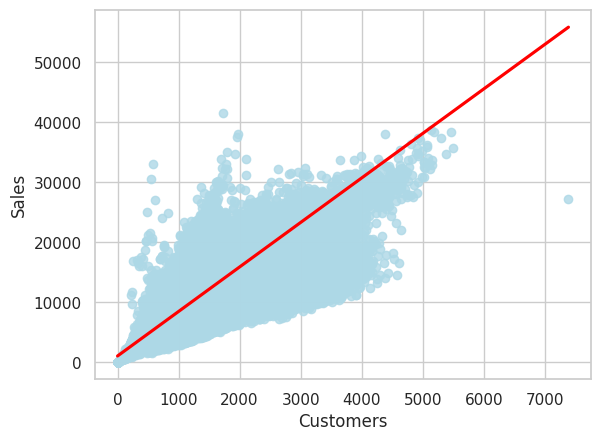

In [27]:
#Grafica de relación entre Sales y Customer con linea de regresión
sns.set(style="whitegrid")
sns.regplot(x=train_df["Customers"], y=train_df["Sales"], color='lightblue', line_kws={'color': 'red'})

plt.xlabel("Customers")
plt.ylabel("Sales")
plt.show()

<ipython-input-28-d3c1ee1d6319>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = train_df["Sales"])


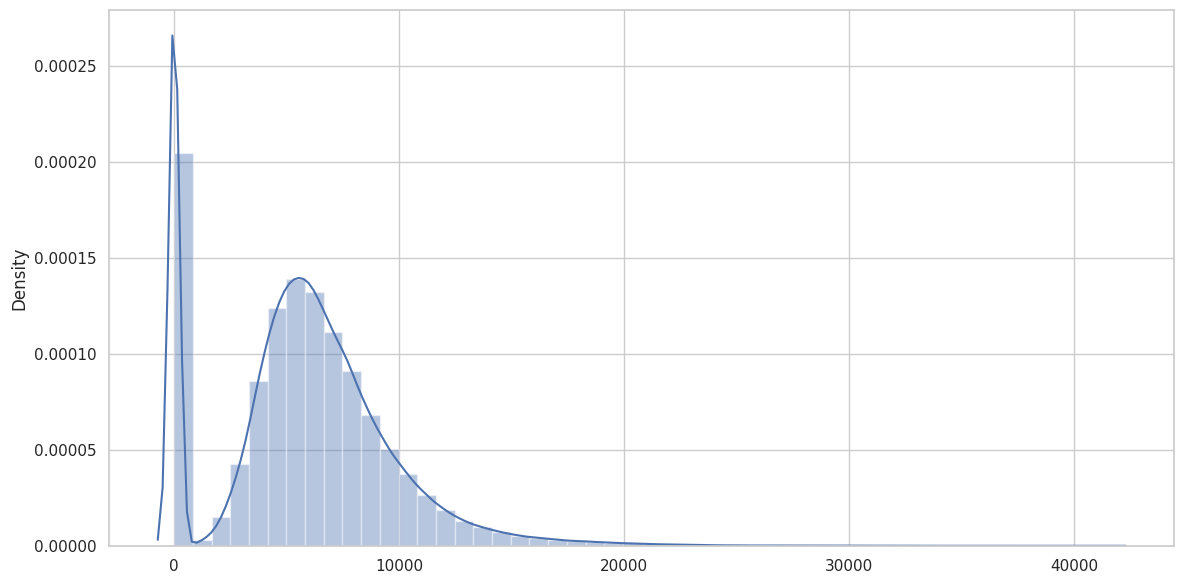

In [28]:
#Gráfica de distribución de Sales
plt.figure(figsize=(12,6))
sns.distplot(x = train_df["Sales"])
plt.tight_layout()

<ipython-input-29-35c2b7997cda>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = train_df["Customers"])


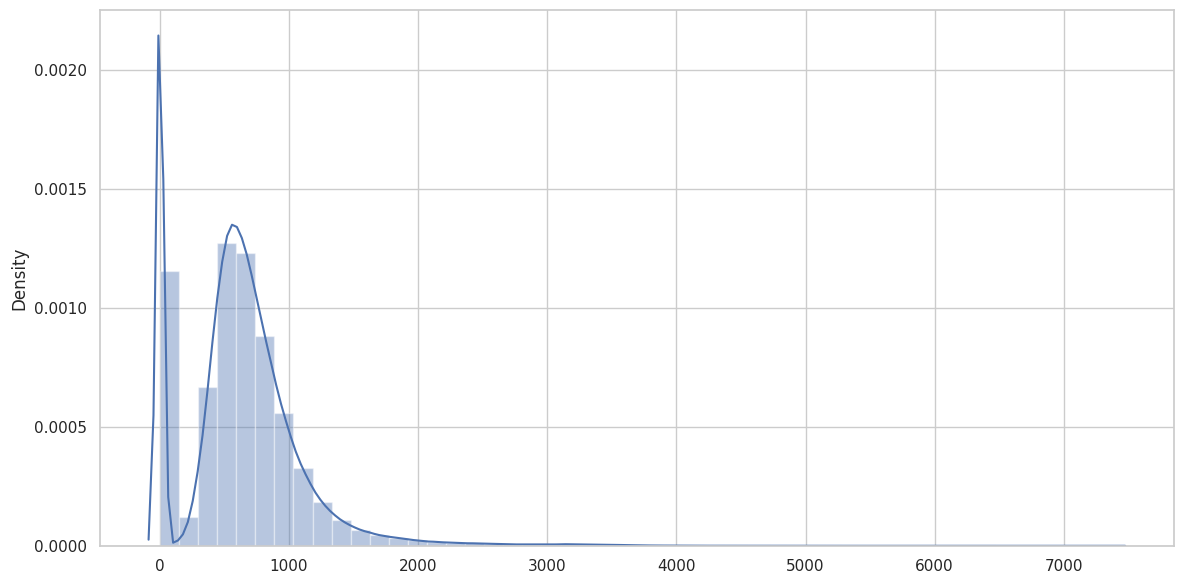

In [29]:
#Grafica de distribución de Customers
plt.figure(figsize=(12,6))
sns.distplot(x = train_df["Customers"])
plt.tight_layout()

In [ ]:
train_df.CompetitionOpenSinceYear.min()

0.0

In [ ]:
train_df.CompetitionOpenSinceYear.max()

2015.0

In [ ]:
len(train_df)

140326

In [ ]:
(train_df['CompetitionOpenSinceYear'] == 0).sum()

44551

In [ ]:
value_counts_table = train_df['CompetitionOpenSinceYear'].value_counts().to_frame().reset_index()
value_counts_table.columns = ['CompetitionOpenSinceYear', 'Count']
print(value_counts_table)

    CompetitionOpenSinceYear  Count
0                        0.0  44551
1                     2013.0  10440
2                     2012.0  10318
3                     2014.0   8813
4                     2005.0   7806
5                     2010.0   6925
6                     2008.0   6797
7                     2009.0   6796
8                     2011.0   6795
9                     2007.0   6045
10                    2006.0   5913
11                    2015.0   4780
12                    2002.0   3397
13                    2004.0   2768
14                    2003.0   2394
15                    2001.0   2013
16                    2000.0   1259
17                    1999.0   1007
18                    1990.0    628
19                    1995.0    252
20                    1994.0    252
21                    1961.0    126
22                    1900.0    126
23                    1998.0    125


In [ ]:
# se agregan nuevos atributos en relación a la antiguedad
train_df['CompetitionOpen'] = 12 * (train_df.Year - train_df.CompetitionOpenSinceYear) + (train_df.Month - train_df.CompetitionOpenSinceMonth)

In [ ]:
train_df.loc[train_df['CompetitionOpenSinceYear'] == 0, 'CompetitionOpen'] = 0

In [ ]:
train_df['CompetitionOpen'].max()

1386.0

In [ ]:
train_df['CompetitionOpen'] = train_df.CompetitionOpen.apply(lambda x: x if x > 0 else 0)

In [ ]:
train_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'Year', 'Month', 'Week', 'Day', 'Dayofweek',
       'Dayofyear', 'Is_month_end', 'Is_month_start', 'Is_quarter_end',
       'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Elapsed',
       'WeekOfYear', 'Easter holiday', 'No Holiday', 'Public Holiday',
       'Type A', 'Type B', 'Type C', 'Type D', 'Basic', 'Extended', 'Extra',
       'From Feb to Nov', 'From Jan to Oct', 'From Mar to Dec',
       'No PromoInterval', 'CompetitionOpen'],
      dtype='object')

In [ ]:
train_df['PromoOpen'] = 12 * (train_df.Year - train_df.Promo2SinceYear) + (train_df.WeekOfYear - train_df.Promo2SinceWeek) / 4.0

In [ ]:
train_df.loc[train_df['Promo2SinceYear'] == 0, 'PromoOpen'] = 0

In [ ]:
train_df['PromoOpen'].max()

72.0

In [ ]:
train_df['PromoOpen'] = train_df.PromoOpen.apply(lambda x: x if x > 0 else 0)

In [ ]:
open_values = train_df.loc[train_df['Sales'] == 0, 'Open']
print(open_values)

5         0
12        0
19        0
26        0
33        0
         ..
140311    0
140317    0
140318    0
140320    0
140325    0
Name: Open, Length: 25692, dtype: int64


In [ ]:
# se filtran los casos donde 'Sales' es igual a 0 y 'Open' es diferente de 0
filtered_data = train_df.loc[(train_df['Sales'] == 0) & (train_df['Open'] == 1)]
print(filtered_data)

        Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
122278    971          5 2015-05-15      0          0     1    0.0   

        SchoolHoliday  CompetitionDistance  CompetitionOpenSinceMonth  ...  \
122278            1.0               1140.0                        5.0  ...   

        Type D  Basic  Extended  Extra  From Feb to Nov  From Jan to Oct  \
122278       0      1         0      0                0                0   

        From Mar to Dec  No PromoInterval  CompetitionOpen  PromoOpen  
122278                1                 0             48.0       37.5  

[1 rows x 44 columns]


In [ ]:
len(train_df)

140326

In [ ]:
# se consideran solo las stores open
train_df = train_df[train_df["Open"] != 0]
# se consideran solo los registros con ventas mayores a 0. Simplifica el cálculo de rmspe
train_df = train_df[train_df["Sales"] > 0]

In [ ]:
len(train_df)

114634

##Test Set

In [ ]:
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,857,1,3,2015-09-16,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1713,1,2,2015-09-15,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,2569,1,1,2015-09-14,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,3425,1,7,2015-09-13,0.0,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         41088 non-null  int64  
 1   Store                      41088 non-null  int64  
 2   DayOfWeek                  41088 non-null  int64  
 3   Date                       41088 non-null  object 
 4   Open                       41077 non-null  float64
 5   Promo                      41088 non-null  int64  
 6   StateHoliday               41088 non-null  object 
 7   SchoolHoliday              41088 non-null  int64  
 8   StoreType                  41088 non-null  object 
 9   Assortment                 41088 non-null  object 
 10  CompetitionDistance        40992 non-null  float64
 11  CompetitionOpenSinceMonth  25872 non-null  float64
 12  CompetitionOpenSinceYear   25872 non-null  float64
 13  Promo2                     41088 non-null  int

In [ ]:
test_df.isna().sum()

Id                               0
Store                            0
DayOfWeek                        0
Date                             0
Open                            11
Promo                            0
StateHoliday                     0
SchoolHoliday                    0
StoreType                        0
Assortment                       0
CompetitionDistance             96
CompetitionOpenSinceMonth    15216
CompetitionOpenSinceYear     15216
Promo2                           0
Promo2SinceWeek              17232
Promo2SinceYear              17232
PromoInterval                17232
dtype: int64

In [ ]:
test_df["CompetitionDistance"].replace(np.nan,test_df["CompetitionDistance"].mean(),inplace=True)
test_df.fillna(0,inplace=True)

In [ ]:
test_df["Date"] = pd.to_datetime(test_df["Date"])

In [ ]:
test_df['WeekOfYear'] = test_df.Date.dt.weekofyear

<ipython-input-73-49af559338a1>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  test_df['WeekOfYear'] = test_df.Date.dt.weekofyear


In [ ]:
test_df = add_datepart(test_df, 'Date' , drop=False)

In [ ]:
test_df["StateHoliday"].replace("0",0,inplace=True)

In [ ]:
test_df["StateHoliday"] = test_df["StateHoliday"].replace("a","Public Holiday").replace("b","Easter holiday").replace("c","Christmas").replace(0,"No Holiday")

In [ ]:
test_df["StoreType"] = test_df["StoreType"].replace("a","Type A").replace("b","Type B").replace("c","Type C").replace("d","Type D")

In [ ]:
test_df["Assortment"] = test_df["Assortment"].replace("a","Basic").replace("b","Extra").replace("c","Extended")

In [ ]:
test_df["PromoInterval"] = test_df["PromoInterval"].replace(0,"No PromoInterval").replace("Jan,Apr,Jul,Oct","From Jan to Oct").replace("Feb,May,Aug,Nov","From Feb to Nov").replace("Mar,Jun,Sept,Dec","From Mar to Dec")

In [ ]:
StateHoliday_dumm = pd.get_dummies(test_df["StateHoliday"])
test_df =pd.concat([test_df,StateHoliday_dumm],axis=1)
test_df.drop("StateHoliday",axis=1,inplace=True)

In [ ]:
StoreType_dumm = pd.get_dummies(test_df["StoreType"])
test_df =pd.concat([test_df,StoreType_dumm],axis=1)
test_df.drop("StoreType",axis=1,inplace=True)

In [ ]:
Assortment_dumm = pd.get_dummies(test_df["Assortment"])
test_df =pd.concat([test_df,Assortment_dumm],axis=1)
test_df.drop("Assortment",axis=1,inplace=True)

In [ ]:
PromoInterval_dumm = pd.get_dummies(test_df["PromoInterval"])
test_df =pd.concat([test_df,PromoInterval_dumm],axis=1)
test_df.drop("PromoInterval",axis=1,inplace=True)

In [ ]:
test_df['CompetitionOpen'] = 12 * (test_df.Year - test_df.CompetitionOpenSinceYear) + (test_df.Month - test_df.CompetitionOpenSinceMonth)
test_df['CompetitionOpen'] = test_df.CompetitionOpen.apply(lambda x: x if x > 0 else 0)
test_df['PromoOpen'] = 12 * (test_df.Year - test_df.Promo2SinceYear) + (test_df.WeekOfYear - test_df.Promo2SinceWeek) / 4.0
test_df['PromoOpen'] = test_df.PromoOpen.apply(lambda x: x if x > 0 else 0)

In [ ]:
test_df.loc[test_df['CompetitionOpenSinceYear'] == 0, 'CompetitionOpen'] = 0
test_df.loc[test_df['Promo2SinceYear'] == 0, 'PromoOpen'] = 0

In [ ]:
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,...,Type D,Basic,Extended,Extra,From Feb to Nov,From Jan to Oct,From Mar to Dec,No PromoInterval,CompetitionOpen,PromoOpen
0,1,1,4,2015-09-17,1.0,1,0,1270.0,9.0,2008.0,...,0,1,0,0,0,0,0,1,84.0,0.0
1,857,1,3,2015-09-16,1.0,1,0,1270.0,9.0,2008.0,...,0,1,0,0,0,0,0,1,84.0,0.0
2,1713,1,2,2015-09-15,1.0,1,0,1270.0,9.0,2008.0,...,0,1,0,0,0,0,0,1,84.0,0.0
3,2569,1,1,2015-09-14,1.0,1,0,1270.0,9.0,2008.0,...,0,1,0,0,0,0,0,1,84.0,0.0
4,3425,1,7,2015-09-13,0.0,0,0,1270.0,9.0,2008.0,...,0,1,0,0,0,0,0,1,84.0,0.0


In [ ]:
ids = test_df["Id"]
test_df.drop("Id",axis=1,inplace=True)

In [ ]:
# se agregan las columnas faltantes en el conjunto de test
test_df["Christmas"] = 0
test_df["Easter holiday"] = 0

In [ ]:
test_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'SchoolHoliday',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'WeekOfYear', 'Year', 'Month', 'Week', 'Day',
       'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start',
       'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start',
       'Elapsed', 'No Holiday', 'Public Holiday', 'Type A', 'Type B', 'Type C',
       'Type D', 'Basic', 'Extended', 'Extra', 'From Feb to Nov',
       'From Jan to Oct', 'From Mar to Dec', 'No PromoInterval',
       'CompetitionOpen', 'PromoOpen', 'Christmas', 'Easter holiday'],
      dtype='object')

# Separación Test / Train

In [ ]:
X = train_df.drop('Sales', axis=1)
Y = train_df['Sales']

In [ ]:
# se define el conjunto de validación dentro de train_df
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2 ,  random_state=42)

In [ ]:
# se define conjunto de validación utilizando el último 20% de los datos
#train_df.tail()
#index = int(len(train_df) * 0.2)
#X_test = train_df.iloc[:index]
#X_test.tail()
#X_train = train_df.iloc[index:]
#X_train.head()
#y_train = X_train['Sales']
#y_test = X_test['Sales']
#X_train = X_train.drop(['Sales'],axis=1)
#X_test = X_test.drop(['Sales'],axis=1)

In [ ]:
X_train = X_train.drop(['Date', 'Customers'],axis=1)
X_test = X_test.drop(['Date', 'Customers'],axis=1)

In [ ]:
# se obtiene el orden de columnas de X_train
column_order = X_train.columns

# se reordenan las columnas de test_df según el orden de column_order
test_df = test_df[column_order]

In [ ]:
X_train.columns

Index(['Store', 'DayOfWeek', 'Open', 'Promo', 'SchoolHoliday',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'Year', 'Month', 'Week', 'Day', 'Dayofweek',
       'Dayofyear', 'Is_month_end', 'Is_month_start', 'Is_quarter_end',
       'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Elapsed',
       'WeekOfYear', 'Easter holiday', 'No Holiday', 'Public Holiday',
       'Type A', 'Type B', 'Type C', 'Type D', 'Basic', 'Extended', 'Extra',
       'From Feb to Nov', 'From Jan to Oct', 'From Mar to Dec',
       'No PromoInterval', 'CompetitionOpen', 'PromoOpen'],
      dtype='object')

In [ ]:
test_df.columns

Index(['Store', 'DayOfWeek', 'Open', 'Promo', 'SchoolHoliday',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'Year', 'Month', 'Week', 'Day', 'Dayofweek',
       'Dayofyear', 'Is_month_end', 'Is_month_start', 'Is_quarter_end',
       'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Elapsed',
       'WeekOfYear', 'Easter holiday', 'No Holiday', 'Public Holiday',
       'Type A', 'Type B', 'Type C', 'Type D', 'Basic', 'Extended', 'Extra',
       'From Feb to Nov', 'From Jan to Oct', 'From Mar to Dec',
       'No PromoInterval', 'CompetitionOpen', 'PromoOpen'],
      dtype='object')

#Entrenamiento y predicción

In [ ]:
# Se define la metrica
def rmspe(y, yhat):
    return np.sqrt(np.mean((yhat/y-1) ** 2))

##Modelos out of the box

In [ ]:
models=[LinearRegression(),xgb.XGBRegressor(n_jobs=-1),RandomForestRegressor(n_jobs=-1),GradientBoostingRegressor()]
model_names=['LinearRegression', 'XGBRegressor', 'RandomForestRegressor', 'GradientBoostingRegressor']
MSE=[]
r_2=[]
accuracy = []
RMSE = []
RMSPE=[]
d={}
for model in range (len(models)):
    model=models[model]
    model.fit(X_train,y_train)
    y_pre=model.predict(X_test) # se obtienen las metricas para el conjunto de validación
    MSE.append(round(mean_squared_error(y_true=y_test,y_pred=y_pre),5))
    r_2.append(r2_score(y_true=y_test,y_pred=y_pre))
    accuracy.append((model.score(X_test,y_test))*100)
    RMSE.append(sqrt(mean_squared_error(y_true=y_test,y_pred=y_pre)))
    RMSPE.append(rmspe(y_test,y_pre))
d=pd.DataFrame({'Modelling Name':model_names,'MSE':MSE,"R_2":r_2,"Accuracy":accuracy,"RMSE":RMSE,"RMSPE":RMSPE})

In [ ]:
d

,Modelling Name,MSE,R_2,Accuracy,RMSE,RMSPE
0,LinearRegression,7.482343e+06,0.234366,23.436639,2735.387173,0.472406
1,XGBRegressor,1.258100e+06,0.871264,87.126442,1121.650637,0.191871
2,RandomForestRegressor,8.419976e+05,0.913842,91.384227,917.604282,0.139955
3,GradientBoostingRegressor,5.589284e+06,0.428074,42.807441,2364.166584,0.428288


## Random search XGBOOST

In [ ]:
# se obtiene el 30% de los datos de entrenamiento más recientes para realizar la busqueda de hiperparámetros
# y se validan los resultados en nuestro conjunto de valdiación

# se calcula el índice para obtener el 30%
#index = int(len(X_train) * 0.3)

# se obtiene el 30% de los registros en X_train y y_train
#X_train_last30 = X_train.iloc[:index]
#y_train_last30 = y_train.iloc[:index]

In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

# se definen los parámetros que deseas buscar
param_dist = {
    'max_depth': sp_randint(1, 10),
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'n_estimators': sp_randint(100, 1000),
    'seed': [42]
}

# se crea un objeto DMatrix para los datos de entrenamiento
#dtrain = xgb.DMatrix(X_train_last30, y_train_last30)
dtrain = xgb.DMatrix(X_train, y_train)

# se crea el regresor XGBoost
xgb_model = xgb.XGBRegressor(n_jobs=-1)

# se crea un objeto RandomizedSearchCV y de utiliza como score la metrica a optimizar
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=5, scoring=make_scorer(rmspe, greater_is_better=False), cv=5, random_state=42)

# se ejecuta la búsqueda aleatoria de hiperparámetros
#random_search.fit(X_train_last30, y_train_last30)
random_search.fit(X_train, y_train)

# se muestra los mejores parámetros encontrados
print("Mejores parámetros encontrados:")
print(random_search.best_params_)

# se entrena un modelo final con los mejores parámetros encontrados
best_model = random_search.best_estimator_

# se utiliza la totalidad de los registros de entrenamiento
best_model.fit(X_train, y_train)

# se realiza predicciones en nuestro conjunto de valdiación
y_pred = best_model.predict(X_test)


Mejores parámetros encontrados:
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 591, 'seed': 42, 'subsample': 0.7}


In [ ]:
#model = xgb.XGBRegressor(colsample_bytree= 1.0, learning_rate= 0.1, max_depth= 8, n_estimators= 591, seed= 42, subsample= 0.7)
#model.fit(X_train, y_train)

# Realiza predicciones en nuestro conjunto de valdiación
#y_pred = model.predict(X_test)

In [ ]:
# se obtiene el resultado de la métrica para el modelo con hiperparámetros optimizados
print('rmspe: ', rmspe(y_test, y_pred))

rmspe:  0.12142380120869208


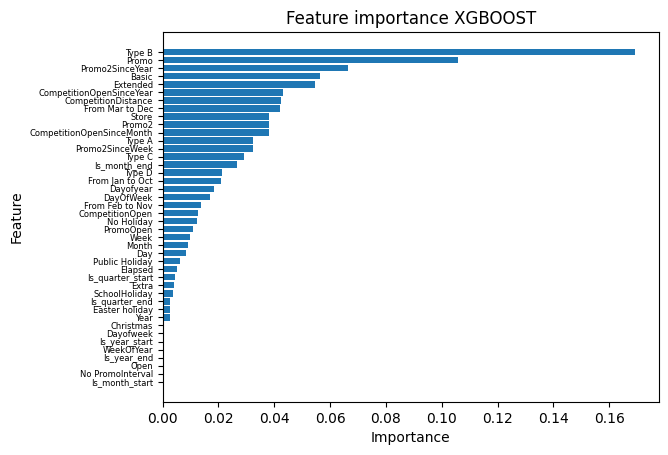

In [ ]:
# Feature importance XGBOOST
feature_importances = pd.DataFrame(best_model.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=True)

# se ajustar el tamaño de las etiquetas
plt.tick_params(axis='y', labelsize=6)

plt.barh(feature_importances.index, feature_importances['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature importance XGBOOST')
plt.show()

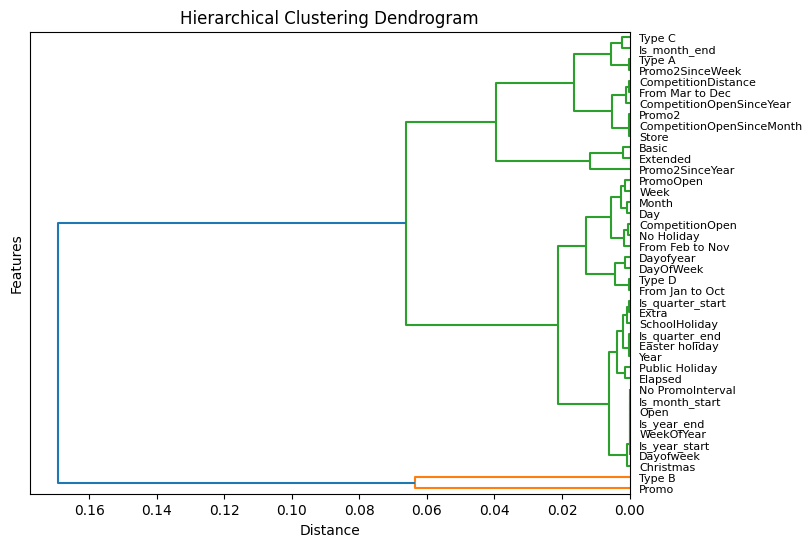

In [ ]:
# Se crea una matriz de enlace jerárquico utilizando el método de enlace completo (complete linkage)
linkage_matrix = sch.linkage(feature_importances['importance'].values.reshape(-1, 1), method='complete')

# Se genera el dendrograma
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(linkage_matrix, labels=feature_importances.index, orientation='left', distance_sort=True)

plt.ylabel('Features')
plt.xlabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')

# Ajustar las posiciones de las etiquetas
plt.subplots_adjust(left=0.3, right=0.9)

plt.show()

In [ ]:
X_train_xgb = X_train.drop(["Dayofweek","Is_year_start","WeekOfYear","Open","Is_year_end","No PromoInterval","Is_month_start"], axis=1)
X_test_xgb = X_test.drop(["Dayofweek","Is_year_start","WeekOfYear","Open","Is_year_end","No PromoInterval","Is_month_start"], axis=1)


In [ ]:
test_df_xgb= test_df.drop(["Dayofweek","Is_year_start","WeekOfYear","Open","Is_year_end","No PromoInterval","Is_month_start"], axis=1)

In [ ]:
X_train.columns

Index(['Store', 'DayOfWeek', 'Open', 'Promo', 'SchoolHoliday',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'Year', 'Month', 'Week', 'Day', 'Dayofweek',
       'Dayofyear', 'Is_month_end', 'Is_month_start', 'Is_quarter_end',
       'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Elapsed',
       'WeekOfYear', 'Easter holiday', 'No Holiday', 'Public Holiday',
       'Type A', 'Type B', 'Type C', 'Type D', 'Basic', 'Extended', 'Extra',
       'From Feb to Nov', 'From Jan to Oct', 'From Mar to Dec',
       'No PromoInterval', 'CompetitionOpen', 'PromoOpen'],
      dtype='object')

In [ ]:
model = xgb.XGBRegressor(colsample_bytree= 1.0, learning_rate= 0.1, max_depth= 8, n_estimators= 591, seed= 42, subsample= 0.7)
model.fit(X_train_xgb, y_train)

# Realiza predicciones en nuestro conjunto de valdiación
y_pred = model.predict(X_test_xgb)

In [ ]:
print('rmspe: ', rmspe(y_test, y_pred))

rmspe:  0.11381427007241887


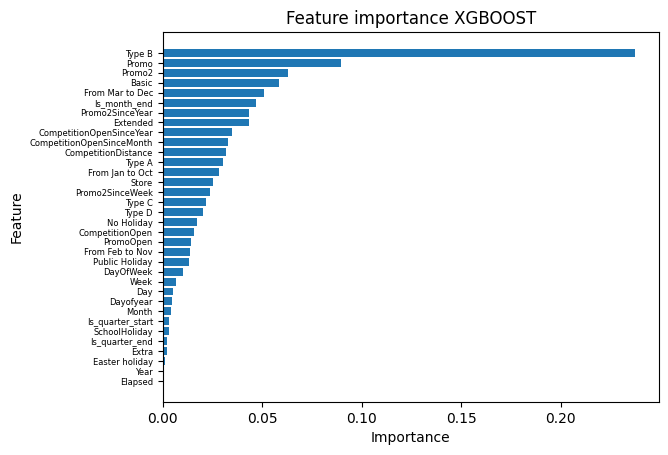

In [ ]:
# Feature importance XGBOOST
feature_importances = pd.DataFrame(model.feature_importances_, index=X_train_xgb.columns, columns=['importance']).sort_values('importance', ascending=True)

# se ajustar el tamaño de las etiquetas
plt.tick_params(axis='y', labelsize=6)

plt.barh(feature_importances.index, feature_importances['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature importance XGBOOST')
plt.show()

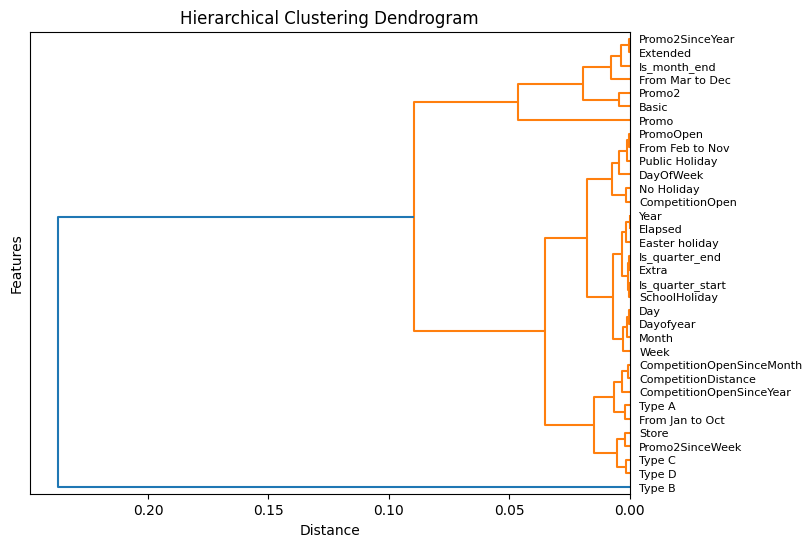

In [ ]:
# Se crea una matriz de enlace jerárquico utilizando el método de enlace completo (complete linkage) luego del Feature Selection
linkage_matrix = sch.linkage(feature_importances['importance'].values.reshape(-1, 1), method='complete')

# Se genera el dendrograma
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(linkage_matrix, labels=feature_importances.index, orientation='left', distance_sort=True)

plt.ylabel('Features')
plt.xlabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')

# Ajustar las posiciones de las etiquetas
plt.subplots_adjust(left=0.3, right=0.9)

plt.show()

##Random search para Random Forest





In [ ]:
#param_dist = {'max_depth':(4,6,8,10,12,14,16,20),
#         'n_estimators':(4,8,16,24,48,72,96,128),
#         'min_samples_split':(2,4,6,8,10)}
param_dist = {
    'n_estimators': range(100, 1100, 100),
    'max_depth': list(range(2, 21)) + [None],
    'min_samples_split': np.linspace(.0001, .01, 100),
    'max_features': range(2, X_train.shape[1])
}

# se crea el modelo Random Forest Regressor
rf = RandomForestRegressor(n_jobs=4)

# se define la función de pérdida para la búsqueda aleatoria
scorer = make_scorer(rmspe, greater_is_better=False)

# se realiza la búsqueda aleatoria de hiperparámetros
random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=30,  # Número de combinaciones de hiperparámetros a probar
    scoring=scorer,
    cv=5,  # Número de divisiones de validación cruzada
    random_state=42
)

# se ejecuta la búsqueda aleatoria de hiperparámetros
random_search.fit(X_train, y_train)

# se muestra los mejores parámetros encontrados
print("Mejores parámetros encontrados:")
print(random_search.best_params_)

# se entrena un modelo final con los mejores parámetros encontrados
best_model_rf = random_search.best_estimator_
best_model_rf.fit(X_train, y_train)

# se realizan las predicciones en nuestro conjunto de validación
y_pred = best_model_rf.predict(X_test)


In [ ]:
#model=RandomForestRegressor()
#    n_estimators=128,
#                             max_depth=20,
#                             min_samples_split=16,
#                             min_samples_leaf=1,
#                             n_jobs=4,
#                             warm_start=False)
#model.fit(X_train,y_train)

# se realizan las predicciones en nuestro conjunto de validación
#y_pred = model.predict(X_test)

In [ ]:
# se obtiene el resultado de la métrica para el modelo con hiperparámetros optimizados
print('rmspe: ', rmspe(y_test, y_pred))

rmspe:  0.3409795490014296


In [ ]:
# Feature importance Random Forest
feature_importances = pd.DataFrame(best_model_rf.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=True)

# se ajusta el tamaño de las etiquetas
plt.tick_params(axis='y', labelsize=6)

plt.barh(feature_importances.index, feature_importances['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature importance Random Forest')
plt.show()

## Predicciones finales

In [ ]:
#model = RandomForestRegressor(n_estimators=128, max_depth=20, min_samples_split=10, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=4, random_state=35, verbose=0, warm_start=False)
#model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_depth=20, max_features='auto', min_samples_split=10,
                      n_estimators=128, n_jobs=4, random_state=35)

In [ ]:
# Se utiliza el modelo con mejor resultado:
#best_model
#best_model_rf

#y_pred = best_model_rf.predict(test_df)
#y_pred = best_model.predict(test_df)
#y_pred = model.predict(test_df)
y_pred = model.predict(test_df_xgb)



In [ ]:
Prediction = pd.DataFrame({"Id":ids,"Sales":y_pred})

In [ ]:
Prediction.to_csv("submission3.csv",index=False)

#Segundo Problema de ML

#Lectura de datos

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from fastai.tabular.core import add_datepart
from sklearn.model_selection import RandomizedSearchCV, train_test_split

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import itertools


In [40]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
store_df = pd.read_csv("store.csv")

<ipython-input-40-fd600cfb81b8>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv("train.csv")


In [41]:
# se unen los datasets
train_df = pd.merge(train_df,store_df,how="inner",on="Store")
test_df = pd.merge(test_df,store_df,how="inner",on="Store")

# Análisis exploratorio

<ipython-input-42-6b3261acc41a>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  axes[0,1].bar(train_df.groupby(by="StoreType").sum().Sales.index,train_df.groupby(by="StoreType").sum().Sales/1e9,color=[next(palette),next(palette),next(palette),next(palette)])
<ipython-input-42-6b3261acc41a>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  axes[0,1].bar(train_df.groupby(by="StoreType").sum().Sales.index,train_df.groupby(by="StoreType").sum().Sales/1e9,color=[next(palette),next(palette),next(palette),next(palette)])
<ipython-input-42-6b3261acc41a>:9: FutureWarning: The default value of numeric_only in DataFrame

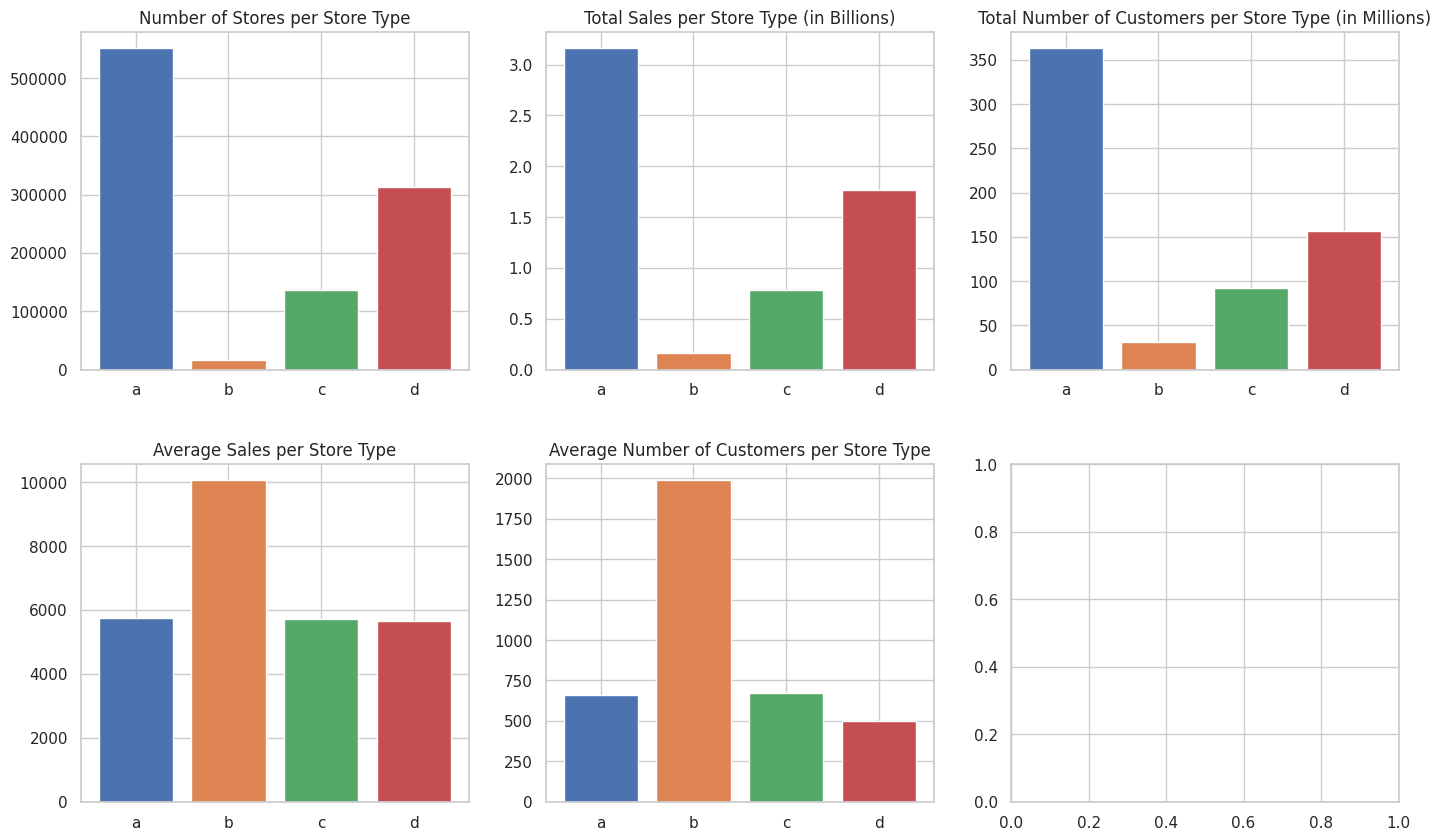

In [42]:
# se analiza la informacion por tipo de tienda
fig, axes = plt.subplots(2, 3,figsize=(17,10) )
palette = itertools.cycle(sns.color_palette(n_colors=4))
plt.subplots_adjust(hspace = 0.28)
axes[0,0].bar(train_df.groupby(by="StoreType").count().Store.index,train_df.groupby(by="StoreType").count().Store,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,0].set_title("Number of Stores per Store Type")
axes[0,1].bar(train_df.groupby(by="StoreType").sum().Sales.index,train_df.groupby(by="StoreType").sum().Sales/1e9,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,1].set_title("Total Sales per Store Type (in Billions)")
axes[0,2].bar(train_df.groupby(by="StoreType").sum().Customers.index,train_df.groupby(by="StoreType").sum().Customers/1e6,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,2].set_title("Total Number of Customers per Store Type (in Millions)")
axes[1,0].bar(train_df.groupby(by="StoreType").sum().Customers.index,train_df.groupby(by="StoreType").Sales.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,0].set_title("Average Sales per Store Type")
axes[1,1].bar(train_df.groupby(by="StoreType").sum().Customers.index,train_df.groupby(by="StoreType").Customers.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,1].set_title("Average Number of Customers per Store Type")
plt.show()

In [43]:
train_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [44]:
X = train_df.drop('StoreType', axis = 1)
y = train_df['StoreType']

In [45]:
print(X)

         Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
0            1          5  2015-07-31   5263        555     1      1   
1            1          4  2015-07-30   5020        546     1      1   
2            1          3  2015-07-29   4782        523     1      1   
3            1          2  2015-07-28   5011        560     1      1   
4            1          1  2015-07-27   6102        612     1      1   
...        ...        ...         ...    ...        ...   ...    ...   
1017204   1115          6  2013-01-05   4771        339     1      0   
1017205   1115          5  2013-01-04   4540        326     1      0   
1017206   1115          4  2013-01-03   4297        300     1      0   
1017207   1115          3  2013-01-02   3697        305     1      0   
1017208   1115          2  2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday Assortment  CompetitionDistance  \
0                  0              1          a               127

In [46]:
y.value_counts()

a    551627
d    312912
c    136840
b     15830
Name: StoreType, dtype: int64

# Ingeniería de atributos

In [47]:
# se reemplazan los nan de "CompetitionDistance" por la media
X["CompetitionDistance"].replace(np.nan,X["CompetitionDistance"].mean(),inplace=True)
# se transforma a 0 todos los valores de na del data set de train
X.fillna(0,inplace=True)

In [48]:
# se obtienen nuevos feautres a partir de la fecha
X = add_datepart(X, 'Date' , drop=True)

In [49]:
X["StateHoliday"].replace("0",0,inplace=True)

In [50]:
# Se reemplaza por su significado
X["StateHoliday"] = X["StateHoliday"].replace("a","Public Holiday").replace("b","Easter holiday").replace("c","Christmas").replace(0,"No Holiday")

In [51]:
# Se reemplaza por su significado
X["Assortment"] = X["Assortment"].replace("a","Basic").replace("b","Extra").replace("c","Extended")

In [52]:
X["PromoInterval"] = X["PromoInterval"].replace(0,"No PromoInterval").replace("Jan,Apr,Jul,Oct","From Jan to Oct").replace("Feb,May,Aug,Nov","From Feb to Nov").replace("Mar,Jun,Sept,Dec","From Mar to Dec")

In [53]:
# se aplica one-hot-encoding
StateHoliday_dumm = pd.get_dummies(X["StateHoliday"])
X =pd.concat([X,StateHoliday_dumm],axis=1)
X.drop("StateHoliday",axis=1,inplace=True)

In [54]:
Assortment_dumm = pd.get_dummies(X["Assortment"])
X =pd.concat([X,Assortment_dumm],axis=1)
X.drop("Assortment",axis=1,inplace=True)

In [55]:
PromoInterval_dumm = pd.get_dummies(X["PromoInterval"])
X =pd.concat([X,PromoInterval_dumm],axis=1)
X.drop("PromoInterval",axis=1,inplace=True)

In [56]:
mapping = {'a': 0, 'b': 1, 'c': 2, 'd': 3}

y = y.map(mapping)

In [57]:
y.value_counts()

0    551627
3    312912
2    136840
1     15830
Name: StoreType, dtype: int64

# Separación Test / Train

In [58]:
# se define el conjunto de validación dentro de train_df
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2 ,  random_state=42)

# Entrenamiento y predicción

## Modelos out of the box

Model:  RandomForestClassifier()
Accuracy:  0.9985106320228861
Confusion Matrix:


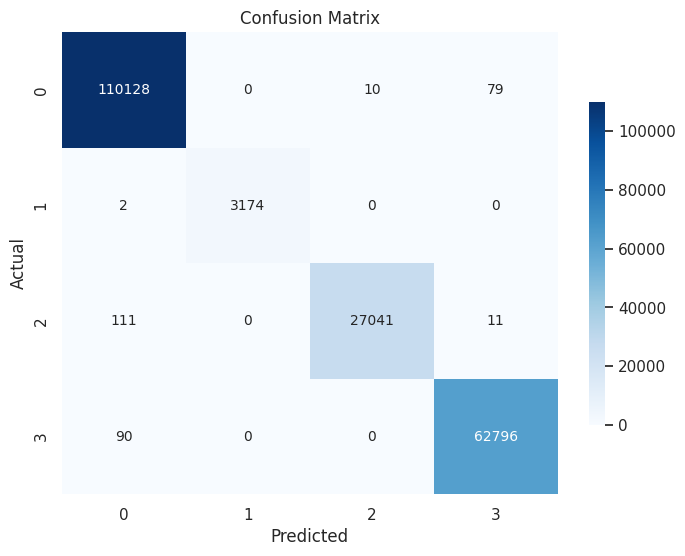

Model:  GradientBoostingClassifier()
Accuracy:  0.7885195780615606
Confusion Matrix:


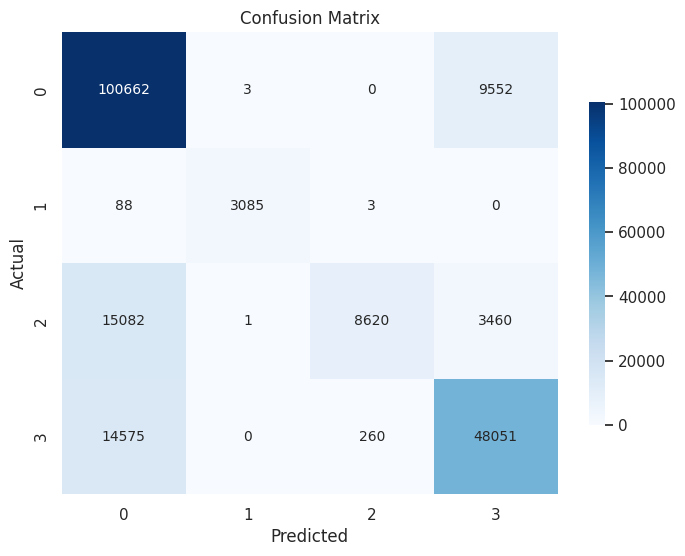

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

models = [RandomForestClassifier(), GradientBoostingClassifier()]
model_names = ['RandomForestClassifier', 'GradientBoostingClassifier']
accuracy = []
confusion_matrices = []

for idx in range(len(models)):
    model = models[idx]
    print('Model: ' , model)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy: ', accuracy)

    # Mostrar la matriz de confusión como un heatmap
    print('Confusion Matrix:')
    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d', annot_kws={"size": 10}, cbar_kws={"shrink": 0.7})
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    ax.set_title('Confusion Matrix', fontsize=12)
    plt.show()
